# Importing Libraries & Dataframe

In [27]:
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pylab as pl

In [5]:
#Creating a path and importing my Chocolate dataframe
path = r'/users/divyaneopaney/Downloads/Chocolate Bar Analysis'
path

'/users/divyaneopaney/Downloads/Chocolate Bar Analysis'

In [7]:
df = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'Cleaned_ChocolateBarRating.csv'))

# Data Preparation & Cleaning

In [11]:
df.columns

Index(['Company  (Maker-if known)', 'BarName', 'REF', 'ReviewDate',
       'CocoaPercent', 'Location', 'Rating', 'BeanType', 'BroadOrigin'],
      dtype='object')

In [13]:
# 1. Standardizing all column names by replacing \xa0 with a regular space and removing any leading or trailing whitespace.
df.columns = [col.replace('\xa0', ' ').strip() for col in df.columns]
# 2. Now renamaing the company/cleaned header
df.rename(columns={'Company  (Maker-if known)': 'Company'}, inplace=True)
df.columns.tolist()

['Company',
 'BarName',
 'REF',
 'ReviewDate',
 'CocoaPercent',
 'Location',
 'Rating',
 'BeanType',
 'BroadOrigin']

In [15]:
df.shape

(1795, 9)

In [17]:
df.head()

,Company,BarName,REF,ReviewDate,CocoaPercent,Location,Rating,BeanType,BroadOrigin
0,A. Morin,Agua Grande,1876,2016,63.0,France,3.75,Unknown,Sao Tome
1,A. Morin,Kpime,1676,2015,70.0,France,2.75,Unknown,Togo
2,A. Morin,Atsane,1676,2015,70.0,France,3.00,Unknown,Togo
3,A. Morin,Akata,1680,2015,70.0,France,3.50,Unknown,Togo
4,A. Morin,Quilla,1704,2015,70.0,France,3.50,Unknown,Peru


In [19]:
#Renaming the column Broad Origin
df.rename(columns={'BroadOrigin': 'Country'}, inplace=True)
print(df.columns)

Index(['Company', 'BarName', 'REF', 'ReviewDate', 'CocoaPercent', 'Location',
       'Rating', 'BeanType', 'Country'],
      dtype='object')


In [23]:
#Checking the datatypes
df.dtypes

Company          object
BarName          object
REF               int64
ReviewDate        int64
CocoaPercent    float64
Location         object
Rating          float64
BeanType         object
Country          object
dtype: object

In [41]:
#Cleaning extra spaces
df.columns = df.columns.str.strip().str.replace(' ', ' ').str.replace(' ', '')

In [31]:
#Removing any categorical columns and only keeping numeric
numerical_df = df[['REF', 'ReviewDate', 'CocoaPercent', 'Rating']].copy()

In [37]:
#Standardizing the Numeric Data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_df)

#Converting back to a DataFrame for clarity
scaled_df = pd.DataFrame(scaled_data, columns=numerical_df.columns)
scaled_df.head()

,REF,ReviewDate,CocoaPercent,Rating
0,1.519895,1.255692,-1.376022,1.180231
1,1.158056,0.913975,-0.268665,-0.912129
2,1.158056,0.913975,-0.268665,-0.389039
3,1.165293,0.913975,-0.268665,0.657141
4,1.208714,0.913975,-0.268665,0.657141


# Elbow Technique

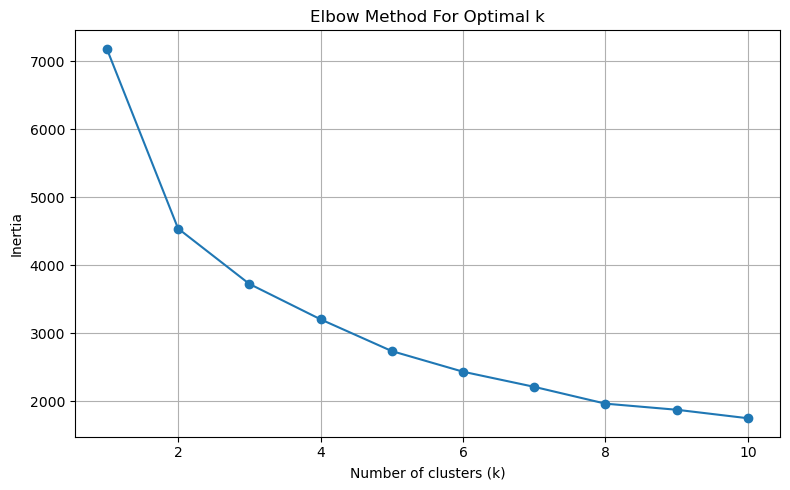

In [44]:
# Use the elbow method to find the optimal number of clusters
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.tight_layout()
plt.show()

# K-Means Clustering

In [58]:
# Running the K means algorithm
kmeans = KMeans(n_clusters=3, random_state=42)

In [79]:
# Fitting the k-means object to the dataframe
df['Cluster'] = kmeans.fit_predict(scaled_df)

# Creating Visualizations

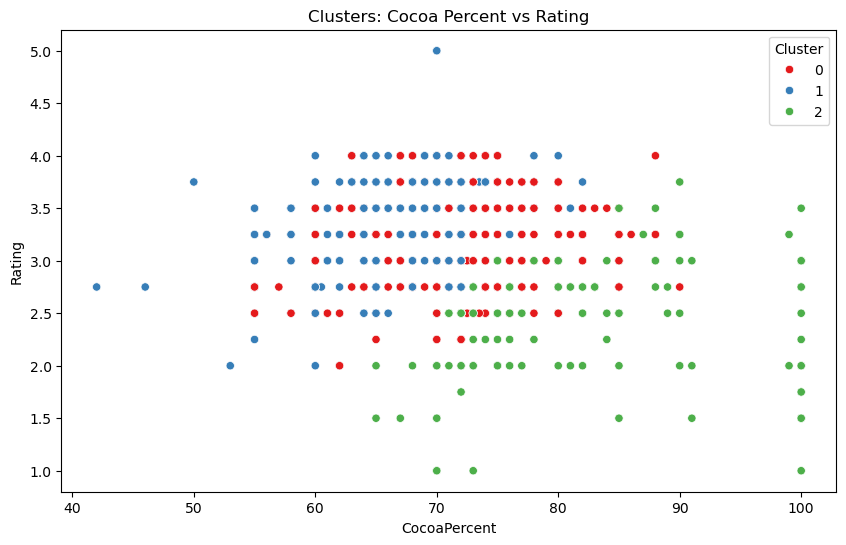

In [91]:
# Building a Scatterplot to show CocoaPercent vs Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='CocoaPercent', y='Rating', hue='Cluster', palette='Set1')
plt.title('Clusters: Cocoa Percent vs Rating')
plt.show()
#This scatterplot visualizes clusters of chocolate data points based on two variables
#CocoaPercent (x-axis) and Rating (y-axis), with points colored by their assigned cluster (0: red, 1: blue, 2: green)

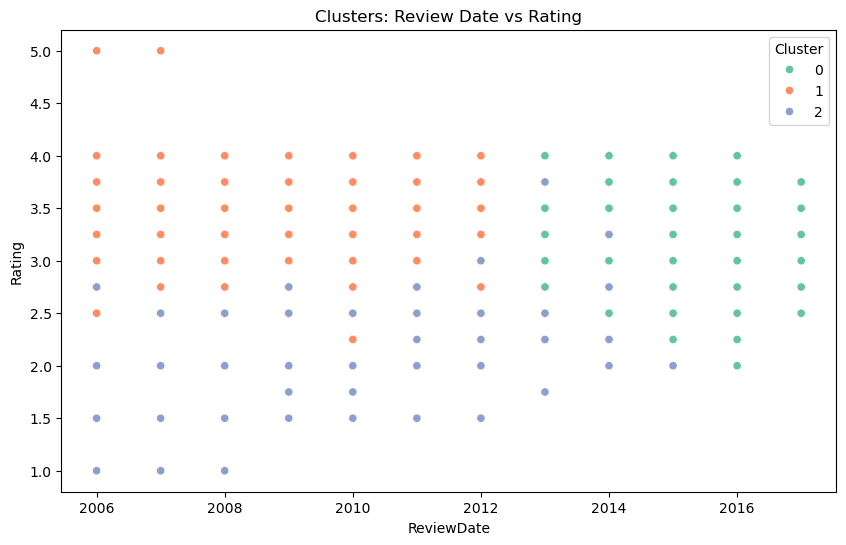

In [89]:
# Building a Scatterplot to compare ReviewDate vs Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='ReviewDate', y='Rating', hue='Cluster', palette='Set2')
plt.title('Clusters: Review Date vs Rating')
plt.show()
#This scatterplot shows clusters based on ReviewDate (x-axis) and Rating (y-axis), with colors representing different clusters

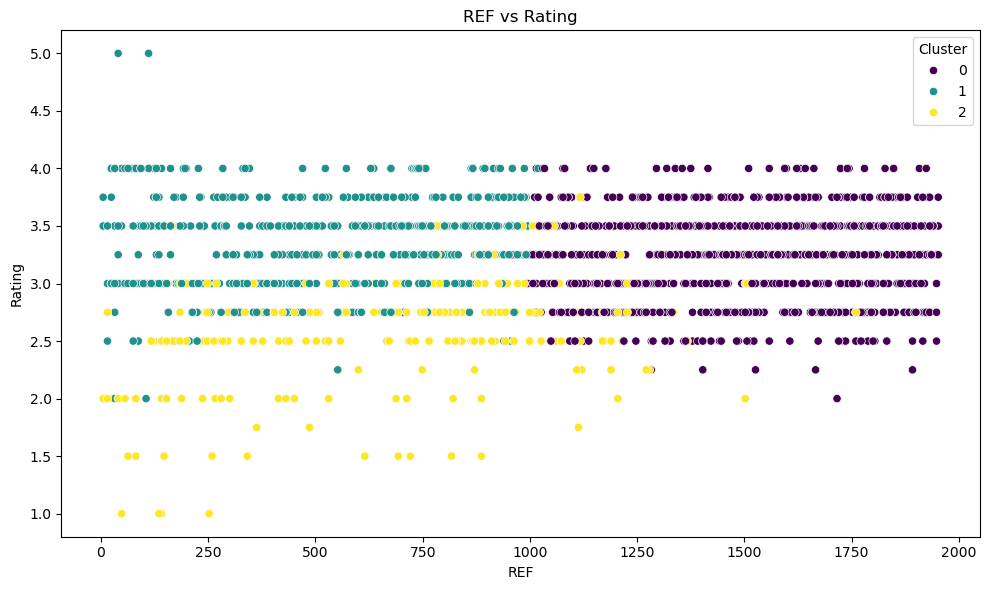

In [95]:
#Creating a scatterplot to show REF Vs Rating 
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='REF', y='Rating', hue='Cluster', palette='viridis')
plt.title('REF vs Rating')
plt.xlabel('REF')
plt.ylabel('Rating')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()
#Although REF is a reference number, plotting it against Rating and color-coding by cluster may show if certain
#clusters are associated with older or newer product batches or exhibit different quality ratings over time. For instance, 
# a concentration of a cluster in low REF numbers might suggest older product entries belonging to that group.

In [71]:
#Descriptive statistics 
cluster_stats = df.groupby('Cluster')[['REF', 'ReviewDate', 'CocoaPercent', 'Rating']].mean()
print(cluster_stats)

                 REF   ReviewDate  CocoaPercent    Rating
Cluster                                                  
0        1489.267316  2014.662338     71.495130  3.242424
1         509.405797  2009.579710     69.037037  3.344203
2         668.100000  2010.508000     79.060000  2.584000
